In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm_notebook
np.set_printoptions(suppress=True)
from sklearn import preprocessing
from tqdm import tqdm
import decimal
from random import shuffle
from time import sleep
tqdm.pandas()
from sklearn.preprocessing import LabelEncoder
import gc
import datetime
import os
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
import random

In [2]:
#Always seed the randomness of this universe
def seed_everything(seed=51):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [3]:
seed_everything(seed=51)

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 700)

In [5]:
%%time
train = pd.read_csv('../input/train.csv')
print("train finished")

<string>:2: DtypeWarning: Columns (416,420) have mixed types. Specify dtype option on import or set low_memory=False.


train finished
CPU times: user 28.8 s, sys: 2.45 s, total: 31.2 s
Wall time: 31.7 s


In [6]:
%%time
test = pd.read_csv('../input/test.csv')
print("test finished")

<string>:2: DtypeWarning: Columns (415,419) have mixed types. Specify dtype option on import or set low_memory=False.


test finished
CPU times: user 24.6 s, sys: 1.46 s, total: 26.1 s
Wall time: 26.5 s


In [7]:
#sample_submission
sample_submission = pd.read_csv('../input/sample_submission.csv')
print(train.shape,test.shape,sample_submission.shape)

(590540, 540) (506691, 539) (506691, 2)


In [8]:
del train['card6']
del test['card6']
gc.collect()

21

# C columns

In [9]:
column_names = ['C' + str(x) for x in range(1,15,1)]
train[column_names].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


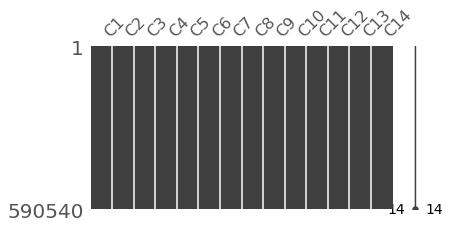

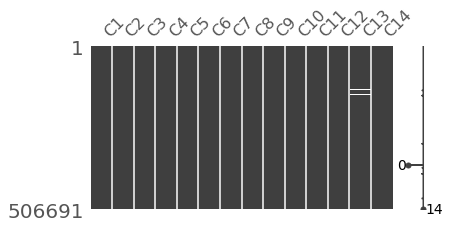

In [10]:
msno.matrix(train[column_names],figsize=(6,3))
msno.matrix(test[column_names],figsize=(6,3))

In [11]:
test[column_names].isnull().sum()

C1        3
C2        3
C3        3
C4        3
C5        3
C6        3
C7        3
C8        3
C9        3
C10       3
C11       3
C12       3
C13    4748
C14       3
dtype: int64

In [12]:
test['C13'].value_counts(normalize=True,dropna=False).head(20).tail(5)

 15.0    0.010811
 16.0    0.010081
 17.0    0.009623
NaN      0.009371
 18.0    0.008621
Name: C13, dtype: float64

In [13]:
#filling nulls
test['C13'].fillna(1,inplace=True)

# D columns

In [14]:
column_names = ['D' + str(x) for x in range(1,16,1)]
train[column_names].head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


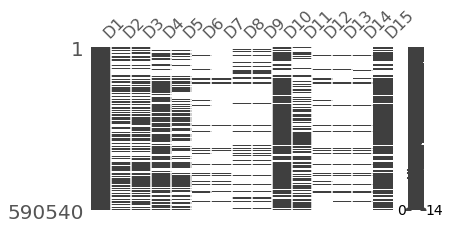

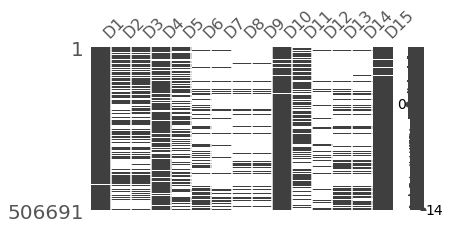

In [15]:
msno.matrix(train[column_names],figsize=(6,3))
msno.matrix(test[column_names],figsize=(6,3))

In [16]:
train[column_names].nunique()

D1       641
D2       641
D3       649
D4       808
D5       688
D6       829
D7       597
D8     12353
D9        24
D10      818
D11      676
D12      635
D13      577
D14      802
D15      859
dtype: int64

In [17]:
columns_dropped = []
for i in column_names:
    if (train[i].isnull().sum()/train.shape[0] > 0.75) | (test[i].isnull().sum()/test.shape[0] > 0.75):
        columns_dropped.append(i)
print(columns_dropped)

['D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14']


In [18]:
train.drop(columns_dropped,axis=1,inplace=True)
test.drop(columns_dropped,axis=1,inplace=True)

In [19]:
print(train.shape,test.shape)

(590540, 532) (506691, 531)


# M columns

In [20]:
column_names = ['M' + str(x) for x in range(1,10,1)]
train[column_names].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


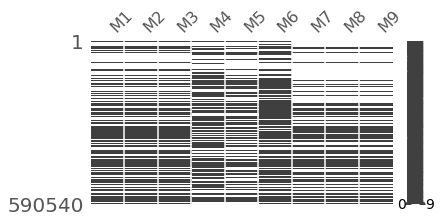

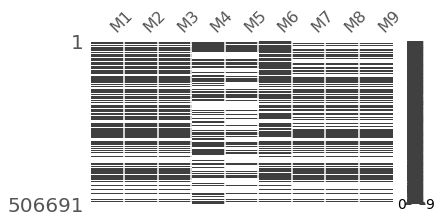

In [21]:
msno.matrix(train[column_names],figsize=(6,3))
msno.matrix(test[column_names],figsize=(6,3))

In [22]:
train[column_names].nunique()

M1    2
M2    2
M3    2
M4    3
M5    2
M6    2
M7    2
M8    2
M9    2
dtype: int64

In [23]:
train[column_names] = train[column_names].fillna('no_value')
test[column_names] = test[column_names].fillna('no_value')

In [24]:
train[i].unique()

array([  0., 315., 111.,  nan, 318., 107.,  45.,  62., 109.,  65.,  26.,
       244., 391., 259., 121., 245., 290., 477., 541., 389.,  22., 289.,
         2., 406., 458.,  20.,   5.,  35.,  12., 104., 248., 237., 466.,
       284.,  46., 455., 456., 218.,  77., 450., 403., 444.,  71.,   9.,
        39., 428., 327.,  40., 249., 143., 292., 416.,  36., 362., 454.,
        72., 479., 120., 426., 247., 453., 457., 124., 335.,   7., 145.,
        14., 100., 413., 232., 268.,  63.,  37., 591.,  30., 363., 190.,
       374.,  76., 151., 152.,  10.,  32.,  82.,  17., 299., 163., 233.,
        66.,  81.,  55., 102., 211., 462., 242., 485., 142., 338., 321.,
       125., 127., 302.,  48.,  93., 137., 304., 421., 330., 471., 212.,
         6.,  27., 264., 117., 461., 439.,  90.,  15., 173., 126., 401.,
       449., 347.,  11., 440., 451.,  97., 420.,  49., 101., 280., 481.,
       332., 385.,  79., 149., 470., 380., 164.,   1., 204., 483., 319.,
         8., 394., 309.,  43., 480.,  92.,  58., 43

In [25]:
for column_name in column_names:
    print(column_name)
    print("=============")
    le = LabelEncoder()
    le.fit(list(train[column_name]) + list(test[column_name]))
    train[column_name] = le.transform(train[column_name])
    test[column_name] = le.transform(test[column_name])

M1
M2
M3
M4
M5
M6
M7
M8
M9


# V columns

In [26]:
column_names = ['V' + str(x) for x in range(1,340,1)]
train[column_names].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [27]:
def x_tick_show(x):
    if x % 5 == 0:
        return 'V' + str(x)
    else:
        return ''

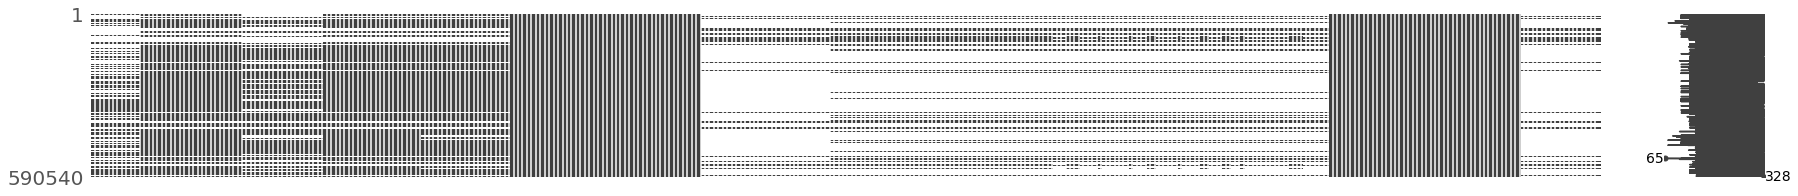

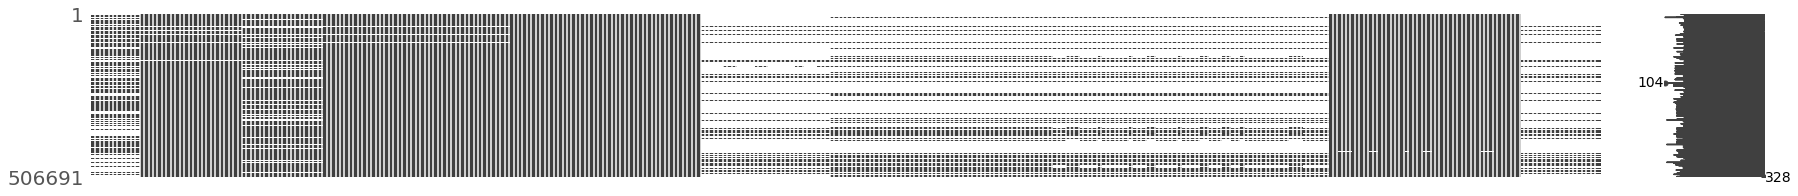

In [28]:
msno.matrix(train[column_names],figsize=(30,3))
msno.matrix(test[column_names],figsize=(30,3))

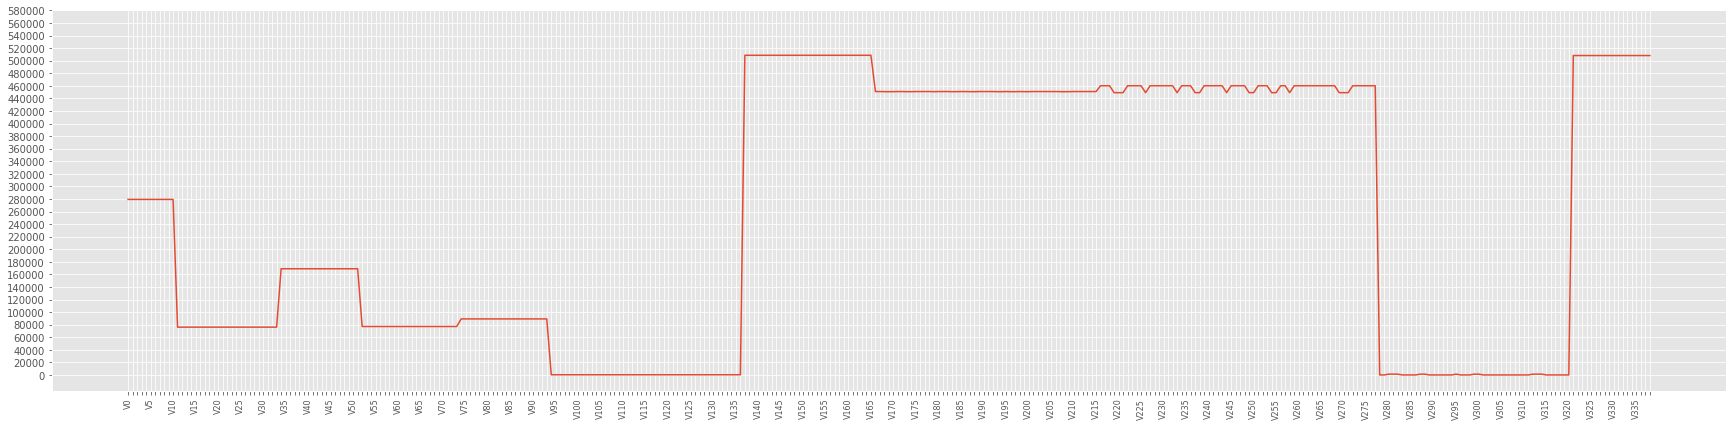

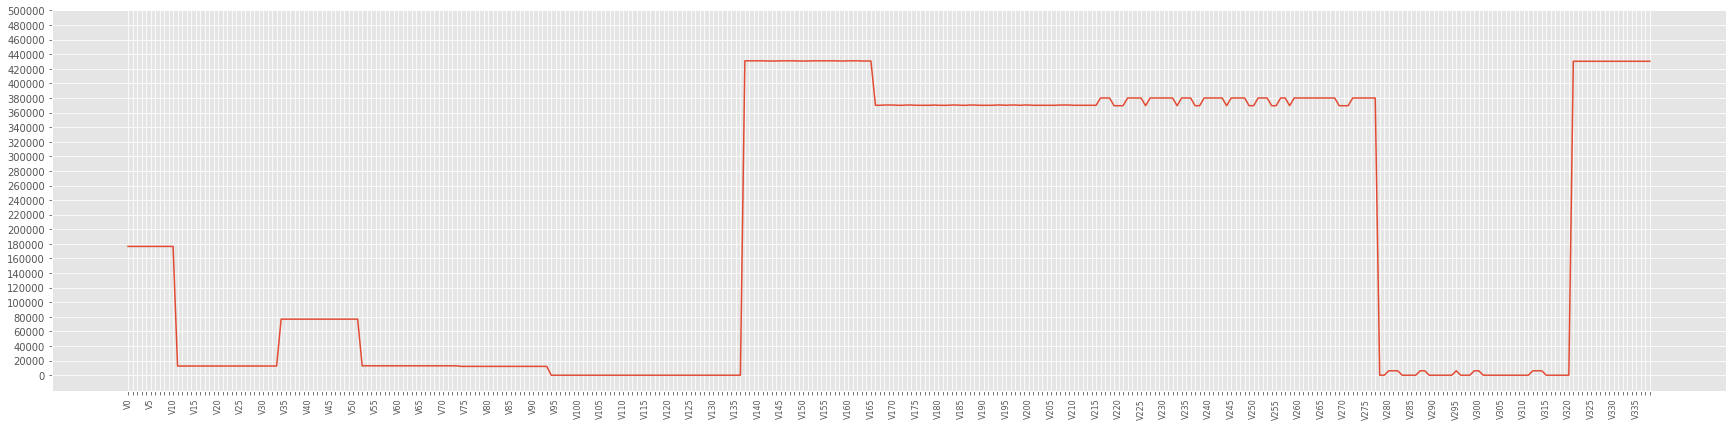

In [29]:
train[column_names].isnull().sum().plot(kind='line',figsize = (30,7))
plt.xticks(range(0,len(column_names),1),labels=[x_tick_show(x) for x in range(len(column_names)) ],fontsize=8, rotation=90)
plt.yticks(range(0,train.shape[0],20000))
plt.show()

test[column_names].isnull().sum().plot(kind='line',figsize = (30,7))
plt.xticks(range(0,len(column_names),1),labels=[x_tick_show(x) for x in range(len(column_names)) ],fontsize=8, rotation=90)
plt.yticks(range(0,test.shape[0],20000))
plt.show()

In [30]:
temp = train[column_names].isnull().sum().reset_index(drop=False).groupby(0)['index'].apply(list)
temp = temp.reset_index(drop=False)
temp.columns = ['number_of_null','columns']
temp['length_of_column'] = temp['columns'].progress_apply(len)
temp['group_number'] = ['group_' + str(x) for x in range(1,temp.shape[0]+1,1)]
columns_list = [y for x in list(temp['columns']) for y in x]

100%|██████████| 15/15 [00:00<00:00, 25575.02it/s]


In [31]:
temp.head()

,number_of_null,columns,length_of_column,group_number
0,12,"[V279, V280, V284, V285, V286, V287, V290, V29...",32,group_1
1,314,"[V95, V96, V97, V98, V99, V100, V101, V102, V1...",43,group_2
2,1269,"[V281, V282, V283, V288, V289, V296, V300, V30...",11,group_3
3,76073,"[V12, V13, V14, V15, V16, V17, V18, V19, V20, ...",23,group_4
4,77096,"[V53, V54, V55, V56, V57, V58, V59, V60, V61, ...",22,group_5


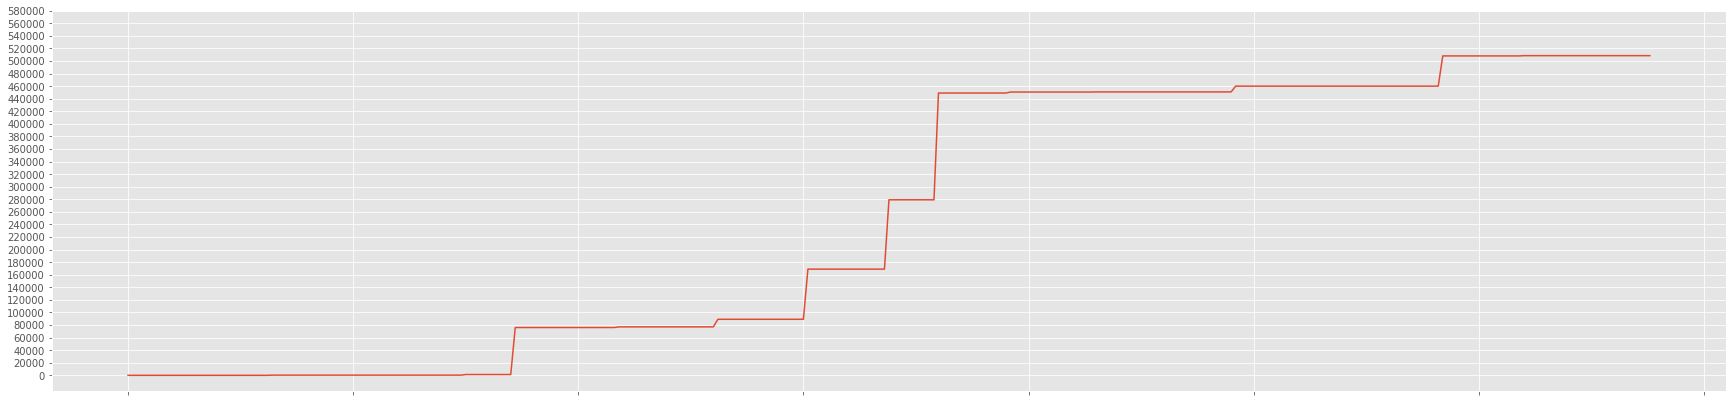

In [32]:
train[columns_list].isnull().sum().plot(kind='line',figsize = (30,7))
#plt.xticks(range(0,len(column_names),1),labels=[x_tick_show(x) for x in range(len(columns_list)) ],fontsize=8, rotation=90)
plt.yticks(range(0,train.shape[0],20000))
plt.show()


In [33]:
temp_dict = temp.set_index('group_number')['columns'].to_dict()

In [34]:
aggregation_list = ['mean','median','min','max','sum','std','kurtosis']

In [35]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DT,month,weekofyear,dayofyear,hour,dayofweek,day,card1_999999,card1_fraudulent,card2_999999,card2_fraudulent,card3_999999,card3_185.0,card4_discover,card5_nan,card5_999999,card5_137.0,card5_118.0,card5_100.0,card5_150.0,card5_229.0,card5_117.0,card5_166.0,card5_126.0,is_debit,ProductCD_C,ProductCD_W,addr1_999999,addr1_nan,addr1_888888.0,addr1_191.0,addr1_184.0,addr1_436.0,addr1_143.0,addr1_205.0,addr1_194.0,addr1_494.0,addr1_444.0,addr2_999999,addr2_nan,addr2_96.0,addr2_999999.0,TransactionAmt_decimal,TransactionAmt_check,dist1_999999,dist1_nan,dist1_91.0,dist1_130.0,dist1_116.0,dist1_108.0,dist1_86.0,dist1_95.0,dist1_114.0,dist1_33.0,dist1_12.0,dist1_27.0,dist1_50.0,dist1_55.0,dist1_54.0,dist1_42.0,dist1_47.0,dist1_35.0,dist1_43.0,dist1_49.0,dist2_999999,dist2_nan,dist2_0.0,dist2_9.0,dist2_1.0,dist2_10.0,dist2_68.0,dist2_999999.0,dist2_7.0,P_emaildomain_prefix,P_emaildomain_suffix,P_emaildomain_lesscategory,P_emaildomain_999999,P_emaildomain_nan,P_emaildomain_mail.com,P_emaildomain_outlook.es,P_emaildomain_aim.com,P_emaildomain_outlook.com,P_emaildomain_roadrunner.com,P_emaildomain_verizon.net,P_emaildomain_att.net,P_emaildomain_sbcglobal.net,P_emaildomain_rocketmail.com,P_emaildomain_windstream.net,P_emaildomain_hotmail.fr,P_emaildomain_protonmail,R_emaildomain_prefix,R_emaildomain_suffix,R_emaildomain_lesscategory,R_emaildomain_999999,R_emaildomain_nan,R_emaildomain_protonmail,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_icloud.com,R_emaildomain_gmail.com,R_emaildomain_bellsouth.net,R_emaildomain_sbcglobal.net,R_emaildomain_msn.com,R_emaildomain_verizon.net,R_emaildomain_hotmail.fr,R_emaildomain_att.net
0,2987000,0,86400,68.5,4,2386,297,7,1,18,27,2,19,14,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,13.0,13.0,0.0,1,1,1,2,0,1,2,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.

In [36]:
for group, columns in tqdm(temp_dict.items()):
    for agg in aggregation_list:
        train[group + '_' + agg] = train[temp_dict[group]].aggregate(func = agg,axis=1)
        test[group + '_' + agg] = test[temp_dict[group]].aggregate(func = agg,axis=1)        

  0%|          | 0/15 [00:00<?, ?it/s]/home/muhammed/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3400: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
100%|██████████| 15/15 [07:45<00:00, 33.63s/it]


# id 01 11

In [38]:
column_names = ['id_' + str(x).zfill(2) for x in range(1,12,1)]
train[column_names].head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


In [39]:
train[column_names].isnull().sum()

id_01    446307
id_02    449668
id_03    524216
id_04    524216
id_05    453675
id_06    453675
id_07    585385
id_08    585385
id_09    515614
id_10    515614
id_11    449562
dtype: int64

In [41]:
for i in column_names:
    train[i + 'is_null'] = train[i].progress_apply(lambda x: 1 if np.isnan(x) else 0)
    test[i + 'is_null'] = test[i].progress_apply(lambda x: 1 if np.isnan(x) else 0)    

c


In [42]:
#multiply
train['id_03' + 'multiply' + 'id_04'] = train['id_03'] * train['id_04']
train['id_05' + 'multiply' + 'id_06'] = train['id_05'] * train['id_06']
train['id_07' + 'multiply' + 'id_08'] = train['id_07'] * train['id_08']
train['id_09' + 'multiply' + 'id_10'] = train['id_09'] * train['id_10']
test['id_03' + 'multiply' + 'id_04'] = test['id_03'] * test['id_04']
test['id_05' + 'multiply' + 'id_06'] = test['id_05'] * test['id_06']
test['id_07' + 'multiply' + 'id_08'] = test['id_07'] * test['id_08']
test['id_09' + 'multiply' + 'id_10'] = test['id_09'] * test['id_10']
#sum
train['id_03' + 'sum' + 'id_04'] = train['id_03'] + train['id_04']
train['id_05' + 'sum' + 'id_06'] = train['id_05'] + train['id_06']
train['id_07' + 'sum' + 'id_08'] = train['id_07'] + train['id_08']
train['id_09' + 'sum' + 'id_10'] = train['id_09'] + train['id_10']
test['id_03' + 'sum' + 'id_04'] = test['id_03'] + test['id_04']
test['id_05' + 'sum' + 'id_06'] = test['id_05'] + test['id_06']
test['id_07' + 'sum' + 'id_08'] = test['id_07'] + test['id_08']
test['id_09' + 'sum' + 'id_10'] = test['id_09'] + test['id_10']
#subtract
train['id_03' + 'subtract' + 'id_04'] = train['id_03'] - train['id_04']
train['id_05' + 'subtract' + 'id_06'] = train['id_05'] - train['id_06']
train['id_07' + 'subtract' + 'id_08'] = train['id_07'] - train['id_08']
train['id_09' + 'subtract' + 'id_10'] = train['id_09'] - train['id_10']
test['id_03' + 'subtract' + 'id_04'] = test['id_03'] - test['id_04']
test['id_05' + 'subtract' + 'id_06'] = test['id_05'] - test['id_06']
test['id_07' + 'subtract' + 'id_08'] = test['id_07'] - test['id_08']
test['id_09' + 'subtract' + 'id_10'] = test['id_09'] - test['id_10']

# id 12 39

In [43]:
column_names = ['id_' + str(x).zfill(2) for x in range(12,39,1)]
train[column_names].head()

,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T


In [45]:
for i in tqdm(column_names):
    train[i + 'is_null'] = train[i].isnull()*1
    test[i + 'is_null'] = test[i].isnull()*1


100%|██████████| 27/27 [00:00<00:00, 43.69it/s]


In [47]:
def less_category(x):
    if x in temp:
        return x
    else:
        return 999999

In [48]:
def less_category_str(x):
    if x in temp:
        return x
    else:
        return '999999'

# id_12

In [49]:
column_name = 'id_12'

In [50]:
train[column_name].fillna('999999',inplace=True)
test[column_name].fillna('999999',inplace=True)

In [51]:
train[column_name].value_counts(normalize=True,dropna=False)

999999      0.755761
NotFound    0.208326
Found       0.035913
Name: id_12, dtype: float64

In [52]:
train[column_name].value_counts(normalize=True,dropna=False) / test[column_name].value_counts(normalize=True,dropna=False)

999999      1.049764
NotFound    0.873130
Found       0.866017
Name: id_12, dtype: float64

In [53]:
train.groupby(column_name)['isFraud'].agg('mean')

id_12
999999      0.020939
Found       0.059836
NotFound    0.081683
Name: isFraud, dtype: float64

In [54]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

# id_13

In [55]:
column_name = 'id_13'

In [56]:
train.groupby(column_name)['isFraud'].agg('mean').sort_values(ascending=False).head(10)

id_13
37.0    1.000000
57.0    1.000000
53.0    1.000000
30.0    0.857143
45.0    0.846154
28.0    0.830508
32.0    0.700000
60.0    0.666667
31.0    0.517241
24.0    0.292453
Name: isFraud, dtype: float64

In [57]:
train[column_name].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: id_13, dtype: float64

In [58]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(463220, 376405)

In [59]:
train[column_name].nunique(),test[column_name].nunique()

(54, 27)

In [60]:
train[column_name].unique()[:5]

array([nan, 49., 52., 14., 20.])

In [61]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

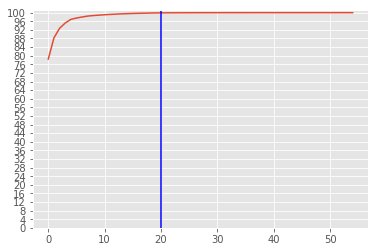

In [62]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(20,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [63]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(20).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

20
16


In [64]:
train[column_name] = train[column_name].progress_apply(less_category)
test[column_name] = test[column_name].progress_apply(less_category)


100%|██████████| 506691/506691 [00:00<00:00, 905054.75it/s]

In [65]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == 999999 else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == 999999 else 0)

In [66]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

In [67]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [68]:
temp

,isFraud,id_13,fraud_count
24.0,0.292453,318,93.0
43.0,0.288599,842,243.0
27.0,0.134206,3666,492.0
999999.0,0.090968,52865,4809.0
18.0,0.088663,688,61.0
11.0,0.085791,373,32.0
51.0,0.076531,196,15.0
52.0,0.074752,58099,4343.0
20.0,0.073662,2878,212.0
25.0,0.062852,1066,67.0


In [69]:
mask1 = ((temp['isFraud'] > 0.07) & (temp[column_name] > 150)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 50))

In [70]:
fraudulent_card = [x for x in list(temp[mask1].index)]
try:
    fraudulent_card.remove(888888.0)
except:
    print("{} not in fraudulent_card".format(888888.0))

888888.0 not in fraudulent_card


In [71]:
print(fraudulent_card)

[24.0, 43.0, 27.0, 999999.0, 18.0, 11.0, 51.0, 52.0, 20.0]


In [75]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

c


In [76]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

In [77]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DT,month,weekofyear,dayofyear,hour,dayofweek,day,card1_999999,card1_fraudulent,card2_999999,card2_fraudulent,card3_999999,card3_185.0,card4_discover,card5_nan,card5_999999,card5_137.0,card5_118.0,card5_100.0,card5_150.0,card5_229.0,card5_117.0,card5_166.0,card5_126.0,is_debit,ProductCD_C,ProductCD_W,addr1_999999,addr1_nan,addr1_888888.0,addr1_191.0,addr1_184.0,addr1_436.0,addr1_143.0,addr1_205.0,addr1_194.0,addr1_494.0,addr1_444.0,addr2_999999,addr2_nan,addr2_96.0,addr2_999999.0,TransactionAmt_decimal,TransactionAmt_check,dist1_999999,dist1_nan,dist1_91.0,dist1_130.0,dist1_116.0,dist1_108.0,dist1_86.0,dist1_95.0,dist1_114.0,dist1_33.0,dist1_12.0,dist1_27.0,dist1_50.0,dist1_55.0,dist1_54.0,dist1_42.0,dist1_47.0,dist1_35.0,dist1_43.0,dist1_49.0,dist2_999999,dist2_nan,dist2_0.0,dist2_9.0,dist2_1.0,dist2_10.0,dist2_68.0,dist2_999999.0,dist2_7.0,P_emaildomain_prefix,P_emaildomain_suffix,P_emaildomain_lesscategory,P_emaildomain_999999,P_emaildomain_nan,P_emaildomain_mail.com,P_emaildomain_outlook.es,P_emaildomain_aim.com,P_emaildomain_outlook.com,P_emaildomain_roadrunner.com,P_emaildomain_verizon.net,P_emaildomain_att.net,P_emaildomain_sbcglobal.net,P_emaildomain_rocketmail.com,P_emaildomain_windstream.net,P_emaildomain_hotmail.fr,P_emaildomain_protonmail,R_emaildomain_prefix,R_emaildomain_suffix,R_emaildomain_lesscategory,R_emaildomain_999999,R_emaildomain_nan,R_emaildomain_protonmail,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_icloud.com,R_emaildomain_gmail.com,R_emaildomain_bellsouth.net,R_emaildomain_sbcglobal.net,R_emaildomain_msn.com,R_emaildomain_verizon.net,R_emaildomain_hotmail.fr,R_emaildomain_att.net,group_1_mean,group_1_median,group_1_min,group_1_max,group_1_sum,group_1_std,group_1_kurtosis,group_2_mean,group_2_median,group_2_min,group_2_max,group_2_sum,group_2_std,group_2_kurtosis,group_3_mean,group_3_median,group_3_min,group_3_max,group_3_sum,group_3_std,gr

# id_14

In [78]:
column_name = 'id_14'

In [84]:
train[column_name].head()

0      NaN
1      NaN
2      NaN
3      NaN
4   -480.0
Name: id_14, dtype: float64

In [79]:
train.groupby(column_name)['isFraud'].agg('mean').sort_values(ascending=False).head(10)

id_14
 360.0    1.000000
 300.0    0.583333
 240.0    0.461538
-180.0    0.380952
 120.0    0.317073
 420.0    0.263158
 0.0      0.234375
-240.0    0.194969
 180.0    0.189189
 480.0    0.150000
Name: isFraud, dtype: float64

In [80]:
train[column_name].head()

0      NaN
1      NaN
2      NaN
3      NaN
4   -480.0
Name: id_14, dtype: float64

In [81]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(510496, 435334)

In [82]:
train[column_name].nunique(),test[column_name].nunique()

(25, 27)

In [83]:
train[column_name].unique()[:5]

array([  nan, -480., -300., -360., -420.])

In [85]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

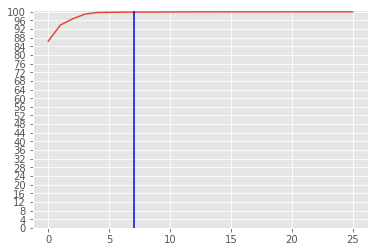

In [88]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(7,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [89]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(7).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

7
7


In [90]:
train[column_name] = train[column_name].apply(less_category)
test[column_name] = test[column_name].apply(less_category)

In [91]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == 999999 else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == 999999 else 0)

In [92]:
train[column_name + '_999999'].sum(),test[column_name + '_999999'].sum()

(962, 817)

In [93]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

In [94]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [95]:
temp

,isFraud,id_14,fraud_count
999999.0,0.197505,962,190.0
60.0,0.056911,369,21.0
-300.0,0.048140,44121,2124.0
-360.0,0.044055,16661,734.0
888888.0,0.033465,510496,17084.0
-480.0,0.033046,12891,426.0
-600.0,0.024096,498,12.0
-420.0,0.015852,4542,72.0


In [96]:
mask1 = ((temp['isFraud'] > 0.07) & (temp[column_name] > 150)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 50))

In [97]:
fraudulent_card = [x for x in list(temp[mask1].index)]
try:
    fraudulent_card.remove(888888.0)
except:
    print("{} not in fraudulent_card".format(888888.0))

888888.0 not in fraudulent_card


In [98]:
print(fraudulent_card)

[999999.0, -420.0]


In [99]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [100]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

In [101]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DT,month,weekofyear,dayofyear,hour,dayofweek,day,card1_999999,card1_fraudulent,card2_999999,card2_fraudulent,card3_999999,card3_185.0,card4_discover,card5_nan,card5_999999,card5_137.0,card5_118.0,card5_100.0,card5_150.0,card5_229.0,card5_117.0,card5_166.0,card5_126.0,is_debit,ProductCD_C,ProductCD_W,addr1_999999,addr1_nan,addr1_888888.0,addr1_191.0,addr1_184.0,addr1_436.0,addr1_143.0,addr1_205.0,addr1_194.0,addr1_494.0,addr1_444.0,addr2_999999,addr2_nan,addr2_96.0,addr2_999999.0,TransactionAmt_decimal,TransactionAmt_check,dist1_999999,dist1_nan,dist1_91.0,dist1_130.0,dist1_116.0,dist1_108.0,dist1_86.0,dist1_95.0,dist1_114.0,dist1_33.0,dist1_12.0,dist1_27.0,dist1_50.0,dist1_55.0,dist1_54.0,dist1_42.0,dist1_47.0,dist1_35.0,dist1_43.0,dist1_49.0,dist2_999999,dist2_nan,dist2_0.0,dist2_9.0,dist2_1.0,dist2_10.0,dist2_68.0,dist2_999999.0,dist2_7.0,P_emaildomain_prefix,P_emaildomain_suffix,P_emaildomain_lesscategory,P_emaildomain_999999,P_emaildomain_nan,P_emaildomain_mail.com,P_emaildomain_outlook.es,P_emaildomain_aim.com,P_emaildomain_outlook.com,P_emaildomain_roadrunner.com,P_emaildomain_verizon.net,P_emaildomain_att.net,P_emaildomain_sbcglobal.net,P_emaildomain_rocketmail.com,P_emaildomain_windstream.net,P_emaildomain_hotmail.fr,P_emaildomain_protonmail,R_emaildomain_prefix,R_emaildomain_suffix,R_emaildomain_lesscategory,R_emaildomain_999999,R_emaildomain_nan,R_emaildomain_protonmail,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_icloud.com,R_emaildomain_gmail.com,R_emaildomain_bellsouth.net,R_emaildomain_sbcglobal.net,R_emaildomain_msn.com,R_emaildomain_verizon.net,R_emaildomain_hotmail.fr,R_emaildomain_att.net,group_1_mean,group_1_median,group_1_min,group_1_max,group_1_sum,group_1_std,group_1_kurtosis,group_2_mean,group_2_median,group_2_min,group_2_max,group_2_sum,group_2_std,group_2_kurtosis,group_3_mean,group_3_median,group_3_min,group_3_max,group_3_sum,group_3_std,gr

# id_15

In [102]:
column_name = 'id_15'

In [103]:
train[column_name].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    New
Name: id_15, dtype: object

In [104]:
train.groupby(column_name)['isFraud'].agg('mean').sort_values(ascending=False).head(10)

id_15
Found      0.105097
Unknown    0.091885
New        0.049244
Name: isFraud, dtype: float64

In [106]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(449555, 369714)

In [107]:
train[column_name].nunique(),test[column_name].nunique()

(3, 3)

In [108]:
train[column_name].unique()[:5]

array([nan, 'New', 'Found', 'Unknown'], dtype=object)

In [109]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

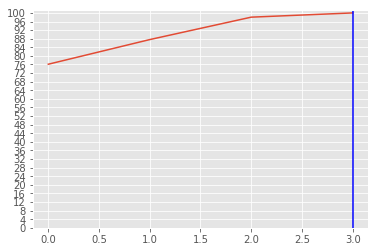

In [110]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(3,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [111]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(7).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

4
4


In [112]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [113]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [114]:
temp

,isFraud,id_15,fraud_count
Found,0.105097,67728,7118.0
Unknown,0.091885,11645,1070.0
New,0.049244,61612,3034.0
888888,0.021001,449555,9441.0


In [115]:
mask1 = ((temp['isFraud'] > 0.07) & (temp[column_name] > 150)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 50))

In [116]:
fraudulent_card = [x for x in list(temp[mask1].index)]
try:
    fraudulent_card.remove('888888.0')
except:
    print("{} not in fraudulent_card".format('888888.0'))

888888.0 not in fraudulent_card


In [117]:
print(fraudulent_card)

['Found', 'Unknown']


In [118]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [120]:
cols_to_remove = []
cols_to_remove.append(column_name)

# id_16

In [141]:
column_name = 'id_16'

In [142]:
train[column_name].head()

0      888888
1      888888
2      888888
3      888888
4    NotFound
Name: id_16, dtype: object

In [123]:
train.groupby(column_name)['isFraud'].agg('mean').sort_values(ascending=False).head(10)

id_16
Found       0.107231
NotFound    0.048242
Name: isFraud, dtype: float64

In [124]:
train[column_name].head()

0         NaN
1         NaN
2         NaN
3         NaN
4    NotFound
Name: id_16, dtype: object

In [125]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(461200, 380944)

In [126]:
train[column_name].nunique(),test[column_name].nunique()

(2, 2)

In [127]:
train[column_name].unique()[:5]

array([nan, 'NotFound', 'Found'], dtype=object)

In [128]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

In [131]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [132]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [133]:
temp

,isFraud,id_16,fraud_count
Found,0.107231,66324,7112.0
NotFound,0.048242,63016,3040.0
888888,0.022791,461200,10511.0


In [134]:
mask1 = ((temp['isFraud'] > 0.07) & (temp[column_name] > 150)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 50))

In [135]:
fraudulent_card = [x for x in list(temp[mask1].index)]
try:
    fraudulent_card.remove(888888.0)
except:
    print("{} not in fraudulent_card".format(888888.0))

888888.0 not in fraudulent_card


In [136]:
print(fraudulent_card)

['Found']


In [137]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [138]:
cols_to_remove.append(column_name)

# id_17

In [143]:
column_name = 'id_17'

In [144]:
train[column_name].head()

0      NaN
1      NaN
2      NaN
3      NaN
4    166.0
Name: id_17, dtype: float64

In [146]:
train[column_name].head()

0      NaN
1      NaN
2      NaN
3      NaN
4    166.0
Name: id_17, dtype: float64

In [147]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(451171, 370725)

In [148]:
train[column_name].nunique(),test[column_name].nunique()

(104, 103)

In [149]:
train[column_name].unique()[:5]

array([ nan, 166., 121., 225., 102.])

In [150]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

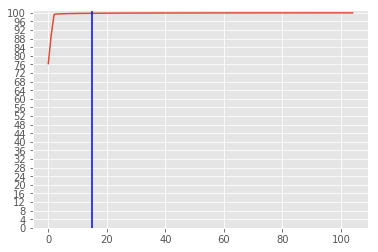

In [154]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(15,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [155]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(15).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

15
15


In [156]:
train[column_name] = train[column_name].apply(less_category)
test[column_name] = test[column_name].apply(less_category)

In [157]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == 999999 else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == 999999 else 0)

In [158]:
train[column_name + '_999999'].sum(),test[column_name + '_999999'].sum()

(1165, 1418)

In [159]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

In [160]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [161]:
temp

,isFraud,id_17,fraud_count
106.0,0.156250,64,10.0
225.0,0.130810,56968,7452.0
102.0,0.110305,689,76.0
100.0,0.098214,336,33.0
999999.0,0.085837,1165,100.0
148.0,0.043668,229,10.0
166.0,0.042604,78631,3350.0
142.0,0.040984,122,5.0
888888.0,0.021316,451171,9617.0
191.0,0.016260,123,2.0


In [168]:
mask1 = ((temp['isFraud'] > 0.07) & (temp[column_name] > 150)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 450))

In [172]:
fraudulent_card

[225.0, 102.0, 100.0, 999999.0]

In [173]:
fraudulent_card = [x for x in list(temp[mask1].index)]
try:
    fraudulent_card.remove(888888)
except:
    print("{} not in fraudulent_card".format(888888.0))
try:
    fraudulent_card.remove(999999)
except:
    print("{} not in fraudulent_card".format(999999.0))   

888888.0 not in fraudulent_card


In [174]:
print(fraudulent_card)

[225.0, 102.0, 100.0]


In [175]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [176]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

In [177]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,...,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DT,month,weekofyear,dayofyear,hour,dayofweek,day,card1_999999,card1_fraudulent,card2_999999,card2_fraudulent,card3_999999,card3_185.0,card4_discover,card5_nan,card5_999999,card5_137.0,card5_118.0,card5_100.0,card5_150.0,card5_229.0,card5_117.0,card5_166.0,card5_126.0,is_debit,ProductCD_C,ProductCD_W,addr1_999999,addr1_nan,addr1_888888.0,addr1_191.0,addr1_184.0,addr1_436.0,addr1_143.0,addr1_205.0,addr1_194.0,addr1_494.0,addr1_444.0,addr2_999999,addr2_nan,addr2_96.0,addr2_999999.0,TransactionAmt_decimal,TransactionAmt_check,dist1_999999,dist1_nan,dist1_91.0,dist1_130.0,dist1_116.0,dist1_108.0,dist1_86.0,dist1_95.0,dist1_114.0,dist1_33.0,dist1_12.0,dist1_27.0,dist1_50.0,dist1_55.0,dist1_54.0,dist1_42.0,dist1_47.0,dist1_35.0,dist1_43.0,dist1_49.0,dist2_999999,dist2_nan,dist2_0.0,dist2_9.0,dist2_1.0,dist2_10.0,dist2_68.0,dist2_999999.0,dist2_7.0,P_emaildomain_prefix,P_emaildomain_suffix,P_emaildomain_lesscategory,P_emaildomain_999999,P_emaildomain_nan,P_emaildomain_mail.com,P_emaildomain_outlook.es,P_emaildomain_aim.com,P_emaildomain_outlook.com,P_emaildomain_roadrunner.com,P_emaildomain_verizon.net,P_emaildomain_att.net,P_emaildomain_sbcglobal.net,P_emaildomain_rocketmail.com,P_emaildomain_windstream.net,P_emaildomain_hotmail.fr,P_emaildomain_protonmail,R_emaildomain_prefix,R_emaildomain_suffix,R_emaildomain_lesscategory,R_emaildomain_999999,R_emaildomain_nan,R_emaildomain_protonmail,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_icloud.com,R_emaildomain_gmail.com,R_emaildomain_bellsouth.net,R_emaildomain_sbcglobal.net,R_emaildomain_msn.com,R_emaildomain_verizon.net,R_emaildomain_hotmail.fr,R_emaildomain_att.net,group_1_mean,group_1_median,group_1_min,group_1_max,group_1_sum,group_1_std,group_1_kurtosis,group_2_mean,group_2_median,group_2_min,group_2_max,group_2_sum,group_2_std,group_2_kurtosis,group_3_mean,group_3_median,group_3_min,group_3_max,group_3_sum,group_3_std,group_3_kurtosis,group_4_mean,gro

# id_18

In [178]:
column_name = 'id_18'

In [179]:
train[column_name].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: id_18, dtype: float64

In [180]:
train[column_name].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: id_18, dtype: float64

In [181]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(545427, 455816)

In [182]:
train[column_name].nunique(),test[column_name].nunique()

(18, 17)

In [183]:
train[column_name].unique()[:5]

array([nan, 15., 18., 13., 12.])

In [184]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

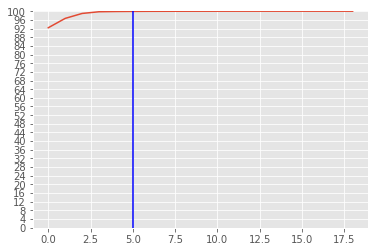

In [186]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(5,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [188]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(5).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

5
5


In [189]:
train[column_name] = train[column_name].apply(less_category)
test[column_name] = test[column_name].apply(less_category)

In [190]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == 999999 else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == 999999 else 0)

In [191]:
train[column_name + '_999999'].sum(),test[column_name + '_999999'].sum()

(1296, 2739)

In [192]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

In [193]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [194]:
temp

,isFraud,id_18,fraud_count
15.0,0.102201,25489,2605.0
999999.0,0.076389,1296,99.0
12.0,0.057131,4656,266.0
13.0,0.056477,13439,759.0
888888.0,0.031036,545427,16928.0
17.0,0.025751,233,6.0


In [195]:
mask1 = ((temp['isFraud'] > 0.07) & (temp[column_name] > 150)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 450))

In [196]:
fraudulent_card = [x for x in list(temp[mask1].index)]

In [197]:
try:
    fraudulent_card.remove(888888)
except:
    print("{} not in fraudulent_card".format(888888.0))
try:
    fraudulent_card.remove(999999)
except:
    print("{} not in fraudulent_card".format(999999.0))   

888888.0 not in fraudulent_card


In [198]:
print(fraudulent_card)

[15.0]


In [199]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [200]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

In [201]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,...,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DT,month,weekofyear,dayofyear,hour,dayofweek,day,card1_999999,card1_fraudulent,card2_999999,card2_fraudulent,card3_999999,card3_185.0,card4_discover,card5_nan,card5_999999,card5_137.0,card5_118.0,card5_100.0,card5_150.0,card5_229.0,card5_117.0,card5_166.0,card5_126.0,is_debit,ProductCD_C,ProductCD_W,addr1_999999,addr1_nan,addr1_888888.0,addr1_191.0,addr1_184.0,addr1_436.0,addr1_143.0,addr1_205.0,addr1_194.0,addr1_494.0,addr1_444.0,addr2_999999,addr2_nan,addr2_96.0,addr2_999999.0,TransactionAmt_decimal,TransactionAmt_check,dist1_999999,dist1_nan,dist1_91.0,dist1_130.0,dist1_116.0,dist1_108.0,dist1_86.0,dist1_95.0,dist1_114.0,dist1_33.0,dist1_12.0,dist1_27.0,dist1_50.0,dist1_55.0,dist1_54.0,dist1_42.0,dist1_47.0,dist1_35.0,dist1_43.0,dist1_49.0,dist2_999999,dist2_nan,dist2_0.0,dist2_9.0,dist2_1.0,dist2_10.0,dist2_68.0,dist2_999999.0,dist2_7.0,P_emaildomain_prefix,P_emaildomain_suffix,P_emaildomain_lesscategory,P_emaildomain_999999,P_emaildomain_nan,P_emaildomain_mail.com,P_emaildomain_outlook.es,P_emaildomain_aim.com,P_emaildomain_outlook.com,P_emaildomain_roadrunner.com,P_emaildomain_verizon.net,P_emaildomain_att.net,P_emaildomain_sbcglobal.net,P_emaildomain_rocketmail.com,P_emaildomain_windstream.net,P_emaildomain_hotmail.fr,P_emaildomain_protonmail,R_emaildomain_prefix,R_emaildomain_suffix,R_emaildomain_lesscategory,R_emaildomain_999999,R_emaildomain_nan,R_emaildomain_protonmail,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_icloud.com,R_emaildomain_gmail.com,R_emaildomain_bellsouth.net,R_emaildomain_sbcglobal.net,R_emaildomain_msn.com,R_emaildomain_verizon.net,R_emaildomain_hotmail.fr,R_emaildomain_att.net,group_1_mean,group_1_median,group_1_min,group_1_max,group_1_sum,group_1_std,group_1_kurtosis,group_2_mean,group_2_median,group_2_min,group_2_max,group_2_sum,group_2_std,group_2_kurtosis,group_3_mean,group_3_median,group_3_min,group_3_max,group_3_sum,group_3_std,group_3_kurtosis,group_4_mean,group_4_media

# id_19

In [202]:
column_name = 'id_19'

In [203]:
train[column_name].head()

0      NaN
1      NaN
2      NaN
3      NaN
4    542.0
Name: id_19, dtype: float64

In [204]:
train[column_name].head()

0      NaN
1      NaN
2      NaN
3      NaN
4    542.0
Name: id_19, dtype: float64

In [205]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(451222, 370785)

In [206]:
train[column_name].nunique(),test[column_name].nunique()

(522, 502)

In [207]:
train[column_name].unique()[:5]

array([ nan, 542., 621., 410., 176.])

In [208]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

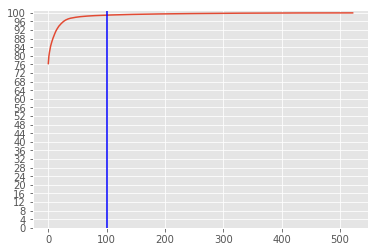

In [210]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(100,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [212]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(100).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

100
93


In [213]:
train[column_name] = train[column_name].apply(less_category)
test[column_name] = test[column_name].apply(less_category)

In [214]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == 999999 else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == 999999 else 0)

In [215]:
train[column_name + '_999999'].sum(),test[column_name + '_999999'].sum()

(10155, 11365)

In [216]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

In [217]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [237]:
temp.head()

,isFraud,id_19,fraud_count
620.0,0.503497,143,72.0
380.0,0.320755,159,51.0
384.0,0.288272,1117,322.0
449.0,0.252874,87,22.0
420.0,0.247059,85,21.0


In [230]:
mask1 = ((temp['isFraud'] > 0.10) & (temp[column_name] > 500)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 500))

In [231]:
fraudulent_card = [x for x in list(temp[mask1].index)]

In [232]:
try:
    fraudulent_card.remove(888888)
except:
    print("{} not in fraudulent_card".format(888888.0))
try:
    fraudulent_card.remove(999999)
except:
    print("{} not in fraudulent_card".format(999999.0))   

888888.0 not in fraudulent_card
999999.0 not in fraudulent_card


In [233]:
print(fraudulent_card)

[384.0, 484.0, 321.0, 567.0, 176.0, 153.0, 271.0, 290.0, 266.0, 216.0, 427.0, 417.0, 390.0, 548.0, 454.0, 633.0, 492.0, 341.0, 277.0]


In [234]:
for i in tqdm(fraudulent_card):
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)


100%|██████████| 19/19 [00:12<00:00,  2.02s/it]


In [235]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

In [236]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,...,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DT,month,weekofyear,dayofyear,hour,dayofweek,day,card1_999999,card1_fraudulent,card2_999999,card2_fraudulent,card3_999999,card3_185.0,card4_discover,card5_nan,card5_999999,card5_137.0,card5_118.0,card5_100.0,card5_150.0,card5_229.0,card5_117.0,card5_166.0,card5_126.0,is_debit,ProductCD_C,ProductCD_W,addr1_999999,addr1_nan,addr1_888888.0,addr1_191.0,addr1_184.0,addr1_436.0,addr1_143.0,addr1_205.0,addr1_194.0,addr1_494.0,addr1_444.0,addr2_999999,addr2_nan,addr2_96.0,addr2_999999.0,TransactionAmt_decimal,TransactionAmt_check,dist1_999999,dist1_nan,dist1_91.0,dist1_130.0,dist1_116.0,dist1_108.0,dist1_86.0,dist1_95.0,dist1_114.0,dist1_33.0,dist1_12.0,dist1_27.0,dist1_50.0,dist1_55.0,dist1_54.0,dist1_42.0,dist1_47.0,dist1_35.0,dist1_43.0,dist1_49.0,dist2_999999,dist2_nan,dist2_0.0,dist2_9.0,dist2_1.0,dist2_10.0,dist2_68.0,dist2_999999.0,dist2_7.0,P_emaildomain_prefix,P_emaildomain_suffix,P_emaildomain_lesscategory,P_emaildomain_999999,P_emaildomain_nan,P_emaildomain_mail.com,P_emaildomain_outlook.es,P_emaildomain_aim.com,P_emaildomain_outlook.com,P_emaildomain_roadrunner.com,P_emaildomain_verizon.net,P_emaildomain_att.net,P_emaildomain_sbcglobal.net,P_emaildomain_rocketmail.com,P_emaildomain_windstream.net,P_emaildomain_hotmail.fr,P_emaildomain_protonmail,R_emaildomain_prefix,R_emaildomain_suffix,R_emaildomain_lesscategory,R_emaildomain_999999,R_emaildomain_nan,R_emaildomain_protonmail,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_icloud.com,R_emaildomain_gmail.com,R_emaildomain_bellsouth.net,R_emaildomain_sbcglobal.net,R_emaildomain_msn.com,R_emaildomain_verizon.net,R_emaildomain_hotmail.fr,R_emaildomain_att.net,group_1_mean,group_1_median,group_1_min,group_1_max,group_1_sum,group_1_std,group_1_kurtosis,group_2_mean,group_2_median,group_2_min,group_2_max,group_2_sum,group_2_std,group_2_kurtosis,group_3_mean,group_3_median,group_3_min,group_3_max,group_3_sum,group_3_std,group_3_kurtosis,group_4_mean,group_4_median,group_4_min,group_4_max,group_4_sum,group_4_std,group_4_kurtosis,group_5_mean,group_5_median,group

In [238]:
train.shape,test.shape

((590540, 729), (506691, 728))

In [239]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [241]:
train.head()

CPU times: user 3.15 ms, sys: 0 ns, total: 3.15 ms
Wall time: 6.05 ms


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,...,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DT,month,weekofyear,dayofyear,hour,dayofweek,day,card1_999999,card1_fraudulent,card2_999999,card2_fraudulent,card3_999999,card3_185.0,card4_discover,card5_nan,card5_999999,card5_137.0,card5_118.0,card5_100.0,card5_150.0,card5_229.0,card5_117.0,card5_166.0,card5_126.0,is_debit,ProductCD_C,ProductCD_W,addr1_999999,addr1_nan,addr1_888888.0,addr1_191.0,addr1_184.0,addr1_436.0,addr1_143.0,addr1_205.0,addr1_194.0,addr1_494.0,addr1_444.0,addr2_999999,addr2_nan,addr2_96.0,addr2_999999.0,TransactionAmt_decimal,TransactionAmt_check,dist1_999999,dist1_nan,dist1_91.0,dist1_130.0,dist1_116.0,dist1_108.0,dist1_86.0,dist1_95.0,dist1_114.0,dist1_33.0,dist1_12.0,dist1_27.0,dist1_50.0,dist1_55.0,dist1_54.0,dist1_42.0,dist1_47.0,dist1_35.0,dist1_43.0,dist1_49.0,dist2_999999,dist2_nan,dist2_0.0,dist2_9.0,dist2_1.0,dist2_10.0,dist2_68.0,dist2_999999.0,dist2_7.0,P_emaildomain_prefix,P_emaildomain_suffix,P_emaildomain_lesscategory,P_emaildomain_999999,P_emaildomain_nan,P_emaildomain_mail.com,P_emaildomain_outlook.es,P_emaildomain_aim.com,P_emaildomain_outlook.com,P_emaildomain_roadrunner.com,P_emaildomain_verizon.net,P_emaildomain_att.net,P_emaildomain_sbcglobal.net,P_emaildomain_rocketmail.com,P_emaildomain_windstream.net,P_emaildomain_hotmail.fr,P_emaildomain_protonmail,R_emaildomain_prefix,R_emaildomain_suffix,R_emaildomain_lesscategory,R_emaildomain_999999,R_emaildomain_nan,R_emaildomain_protonmail,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_icloud.com,R_emaildomain_gmail.com,R_emaildomain_bellsouth.net,R_emaildomain_sbcglobal.net,R_emaildomain_msn.com,R_emaildomain_verizon.net,R_emaildomain_hotmail.fr,R_emaildomain_att.net,group_1_mean,group_1_median,group_1_min,group_1_max,group_1_sum,group_1_std,group_1_kurtosis,group_2_mean,group_2_median,group_2_min,group_2_max,group_2_sum,group_2_std,group_2_kurtosis,group_3_mean,group_3_median,group_3_min,group_3_max,group_3_sum,group_3_std,group_3_kurtosis,group_4_mean,group_4_median,group_4_min,group_4_max,group_4_sum,group_4_std,group_4_kurtosis,group_5_mean,group_5_median,group

In [242]:
%%time
train.to_csv('train2.csv',index=False)

CPU times: user 4min 36s, sys: 2.78 s, total: 4min 39s
Wall time: 4min 40s


In [243]:
%%time
test.to_csv('test2.csv',index=False)

CPU times: user 3min 56s, sys: 1.22 s, total: 3min 57s
Wall time: 3min 57s
